In [ ]:
#Machine learning models
"""
Compare models using a barplot
Accuracy score algorithm
1.Logistic Regression
2.KNN- K-nearest neighbour
3.SVM -Support Vector Machines
4.Naive Bayes -Gaussian Naive Bayes
5.Decision Tree
6.Random Forest
7.Confusion matrixes
"""

In [1]:
#Import libraries
import numpy as np #linear algebra
import pandas as pd #data preparation and processing or data manipulation
import graphviz #visualization of the leaf nodes
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #plotting and data visualization
%matplotlib inline
#ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#Control display
pd.options.display.max_columns = 50
sns.set(style = 'darkgrid', rc = {'axes.facecolor':'#616E7C'})
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('heart_disease.csv')
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Logistic regression
#predict one or more possible outcomes(usually represented as 0 or 1)
#column targets
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [4]:
#Get the mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


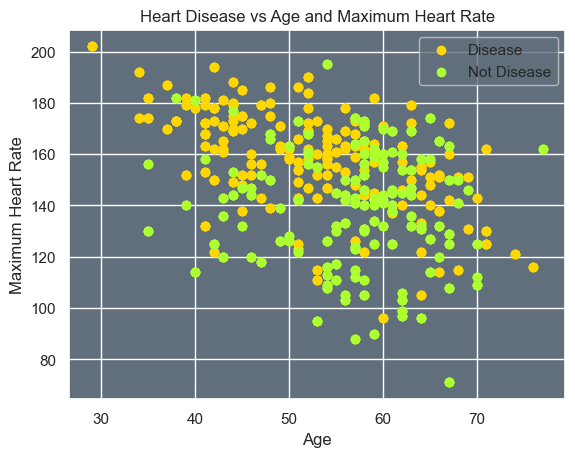

In [5]:
#Create a scatter plot for Heart disease vs Age and Maximum heart rate
plt.scatter(x=df.age[df.target ==1], y =df.thalach[df.target ==1], c ='#FFD700', label ='Disease')
plt.scatter(x=df.age[df.target ==0], y =df.thalach[df.target ==0], c ='#ADFF2F', label ='Not Disease')
#Add a legend
plt.legend()
#Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
#Set the title
plt.title('Heart Disease vs Age and Maximum Heart Rate')
#Show the plot
plt.show()

In [6]:
#Create a LogisticRegression
#Helps to solve problems with classification
#Create the independent and dependent variables
y = df.target.values
x_data = df.drop(['target'], axis =1)

In [7]:
#Normalize the data
x =(x_data - np.min(x_data)) / (np.max(x_data)) - np.min(x_data)

In [24]:
#Split the data 80% training 20% testing 
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size =0.2, random_state=0)

In [25]:
#Transpose matrix
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [28]:
#Get the accuracy using logisticregression
#Getting test accuracy
import numpy as np
from sklearn.linear_model import LogisticRegression

accuracies = {}
lr = LogisticRegression()
#y_train = np.ravel(y_train.T)


In [31]:
#lr.fit(x_train.T, y_train.T)
#acc = lr.score(x_test.T, y_test.T) * 100
#accuracies['LogisticRegression'] = acc
#Get output
#print('Test Accuracy {:.2f}%'.format(acc))


In [35]:
#First inport K-nearest neighbour KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
#Get output 
print('{} KNN score: {:.2f}% '.format(2, knn.score(x_test.T, y_test.T) * 100))

ValueError: Found input variables with inconsistent numbers of samples: [13, 2665]

In [ ]:
#Get maximum KNN score
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors = i) #n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))
    
#Show using line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('Maximum KNN Score')
plt.show()

#Get max KNN score in %
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Max KNN score is {:.2f}'.format(acc))